In [1]:

# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [2]:
df= pd.read_csv('pricerunner_aggregate.csv')

In [3]:
df.head()

,1,apple iphone 8 plus 64gb silver,1.1,1.2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
df.shape

(35310, 7)

In [5]:
df.columns=['product_id','product_title','vendor_id','cluster_id','cluster_label','cat_id','cat_label']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35310 entries, 0 to 35309
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     35310 non-null  int64 
 1   product_title  35310 non-null  object
 2   vendor_id      35310 non-null  int64 
 3   cluster_id     35310 non-null  int64 
 4   cluster_label  35310 non-null  object
 5   cat_id         35310 non-null  int64 
 6   cat_label      35310 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [7]:
df.head()

,product_id,product_title,vendor_id,cluster_id,cluster_label,cat_id,cat_label
0,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [8]:
df=df.drop(['product_title','cluster_label'], axis =1 )

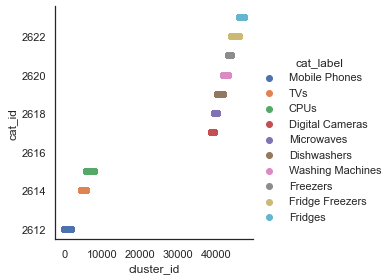

In [9]:
sns.FacetGrid(df, hue="cat_label", size=4) \
   .map(plt.scatter, "cluster_id", "cat_id") \
   .add_legend();

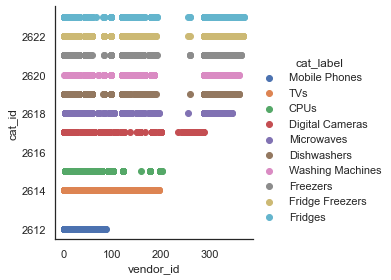

In [10]:
sns.FacetGrid(df, hue="cat_label", size=4) \
   .map(plt.scatter, "vendor_id", "cat_id") \
   .add_legend();

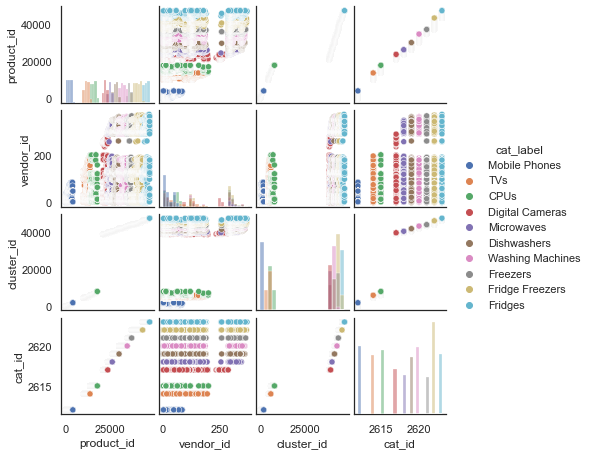

In [11]:
sns.pairplot(df, hue="cat_label", diag_kind="hist", size=1.6);

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['cat_label'], axis =1 )
y = df.iloc[:, -1]

In [13]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,product_id,vendor_id,cluster_id,cat_id
13191,-0.251939,1.106378,0.485696,-0.317480
5887,-1.055423,-0.875785,-1.381974,-1.150683
32059,1.305612,1.542112,0.871365,1.348928
22037,0.464565,-0.841610,0.653707,0.515724
1647,-1.815269,-0.978311,-1.622881,-1.706153


In [14]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, ..., 2, 2, 0])

In [15]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.5815810794545263

In [16]:
contingency_matrix1 = metrics.cluster.contingency_matrix(y,y_cluster_kmeans)
contingency_matrix1

array([[   0, 3862,    0],
       [ 898,    0, 1799],
       [1593,    0, 1831],
       [ 905,    0, 1307],
       [2403,    0, 3098],
       [1865,    0, 1719],
       [ 647,    0, 1695],
       [   0, 4080,    0],
       [   0, 3564,    0],
       [1147,    0, 2897]], dtype=int64)

In [17]:

contingency_matrix1 = metrics.cluster.contingency_matrix(y,y_cluster_kmeans)
contingency_matrix1

array([[   0, 3862,    0],
       [ 898,    0, 1799],
       [1593,    0, 1831],
       [ 905,    0, 1307],
       [2403,    0, 3098],
       [1865,    0, 1719],
       [ 647,    0, 1695],
       [   0, 4080,    0],
       [   0, 3564,    0],
       [1147,    0, 2897]], dtype=int64)

In [18]:
np.amax(contingency_matrix1, axis=0) #finding maximum elements of rows

array([2403, 4080, 3098], dtype=int64)

In [19]:
x = np.sum(np.amax(contingency_matrix1, axis=0)) #Sum of max. elements from each row
x

9581

In [20]:
y = np.sum(contingency_matrix1)  #total sum of all elements in contingency matrix
y

35310

In [21]:
purity = float(x)/float(y) 
purity

0.27133956386292835

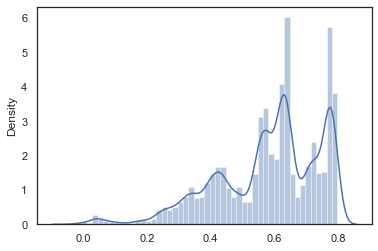

In [22]:
# note that this is the mean over all the samples - there might be some clusters 
# that are well separated and others that are closer together. 
# so let's look at the distribution of silhouette scores...
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

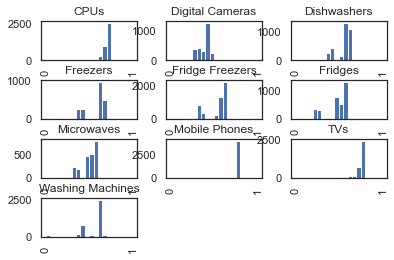

In [23]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['cat_label'] = df['cat_label']
df_scores.hist(by='cat_label', column='SilhouetteScore', range=(0,1.0), bins=20);



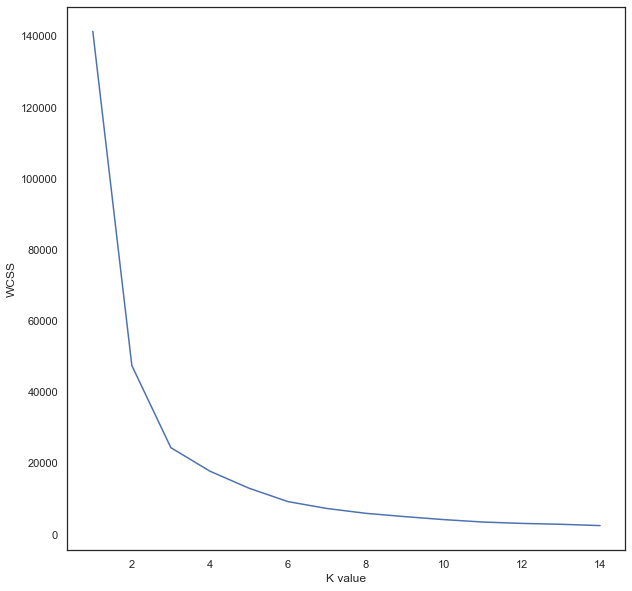

In [24]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

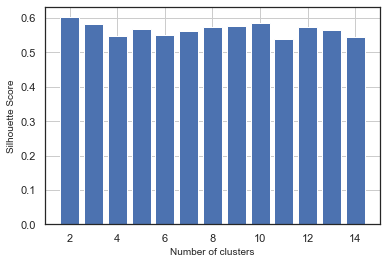

In [25]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(X_scaled, KMeans(n_clusters = n_cluster).fit_predict(X_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [26]:
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_scaled.values)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_scaled.values)
y_cluster_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.6026893168092212

In [28]:
km.inertia_

47377.089475245855

In [29]:
km.cluster_centers_

array([[-1.21700497, -0.64410377, -1.42475227, -1.25442948],
       [ 0.58825656,  0.31133667,  0.68867415,  0.60634623]])

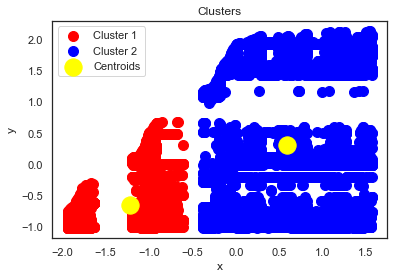

In [30]:
#Visualizing all the clusters 

plt.scatter(X_scaled.values[y_cluster_kmeans == 0, 0], X_scaled.values[y_cluster_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled.values[y_cluster_kmeans == 1, 0], X_scaled.values[y_cluster_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_scaled.values)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_scaled.values)
y_cluster_kmeans

array([0, 0, 0, ..., 4, 4, 4])

In [32]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.5692920112196773

In [33]:
km.inertia_

12920.83809351545

In [34]:
km.cluster_centers_

array([[-1.21700497, -0.64410377, -1.42475227, -1.25442948],
       [ 0.08649097, -0.57345725,  0.57072211,  0.13755935],
       [ 1.1602037 ,  1.57435969,  0.82358364,  1.12475143],
       [ 0.13157619,  1.46035796,  0.58084205,  0.156798  ],
       [ 1.04072203, -0.37457458,  0.79500988,  1.05614936]])

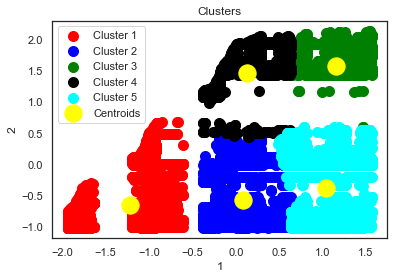

In [35]:
#Visualizing all the clusters 

plt.scatter(X_scaled.values[y_cluster_kmeans == 0, 0], X_scaled.values[y_cluster_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled.values[y_cluster_kmeans == 1, 0], X_scaled.values[y_cluster_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled.values[y_cluster_kmeans == 2, 0], X_scaled.values[y_cluster_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled.values[y_cluster_kmeans == 3, 0], X_scaled.values[y_cluster_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X_scaled.values[y_cluster_kmeans == 4, 0], X_scaled.values[y_cluster_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('1')
plt.ylabel('2')
plt.legend()
plt.show()

In [36]:
nclusters = 6 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_scaled.values)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_scaled.values)
y_cluster_kmeans

array([4, 4, 4, ..., 3, 3, 3])

In [37]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.5509767623540816

In [38]:
km.inertia_

9149.365231999118

In [39]:
km.cluster_centers_

array([[-0.90442595, -0.53986502, -1.32513938, -1.00624337],
       [ 1.1602037 ,  1.57435969,  0.82358364,  1.12475143],
       [ 0.08660724, -0.57329835,  0.57074697,  0.13765757],
       [ 1.04087367, -0.37469821,  0.79504837,  1.05631114],
       [-1.78592942, -0.83382852, -1.60605748, -1.70615252],
       [ 0.13157619,  1.46035796,  0.58084205,  0.156798  ]])

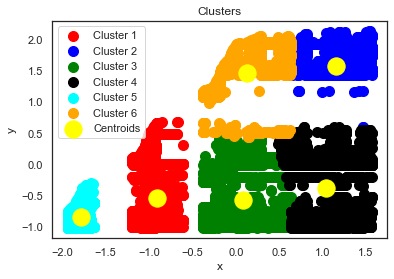

In [40]:
#Visualizing all the clusters 

plt.scatter(X_scaled.values[y_cluster_kmeans == 0, 0], X_scaled.values[y_cluster_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled.values[y_cluster_kmeans == 1, 0], X_scaled.values[y_cluster_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled.values[y_cluster_kmeans == 2, 0], X_scaled.values[y_cluster_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled.values[y_cluster_kmeans == 3, 0], X_scaled.values[y_cluster_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X_scaled.values[y_cluster_kmeans == 4, 0], X_scaled.values[y_cluster_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(X_scaled.values[y_cluster_kmeans == 5, 0], X_scaled.values[y_cluster_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [41]:
df.head()

,product_id,vendor_id,cluster_id,cat_id,cat_label
0,2,2,1,2612,Mobile Phones
1,3,3,1,2612,Mobile Phones
2,4,4,1,2612,Mobile Phones
3,5,5,1,2612,Mobile Phones
4,6,6,1,2612,Mobile Phones


In [45]:
df=df.groupby('cat_label',as_index=False)[['product_id','vendor_id','cluster_id','cat_id']].agg(np.sum)
df.head()

,cat_label,product_id,vendor_id,cluster_id,cat_id
0,CPUs,61180385,198975,25340806,10099130
1,Digital Cameras,60449513,294280,105317459,7058049
2,Dishwashers,96818420,612696,140048159,8967456
3,Freezers,79630388,362805,96235154,5797652
4,Fridge Freezers,222054229,939306,245767292,14423622


In [47]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df_num=df.drop("cat_label",axis=1)

In [48]:
scaler.fit(df_num)

StandardScaler()

In [49]:
X_scaled_array = scaler.transform(df_num)
X_scaled_array

array([[-0.51828685, -0.90819592, -1.10166849,  0.35531083],
       [-0.53044322, -0.52610103, -0.01369062, -0.90925457],
       [ 0.07447011,  0.750486  ,  0.45877517, -0.11527044],
       [-0.21141337, -0.25137197, -0.13724351, -1.43336242],
       [ 2.15748047,  2.05992426,  1.89694585,  2.15355394],
       [ 1.17237105,  1.01821904,  0.82407537,  0.06493925],
       [-0.55984398, -0.54782677, -0.17498942, -1.29459909],
       [-1.39703733, -1.33116039, -1.41616367,  0.58727194],
       [-0.83118244, -0.79718573, -1.21365947,  0.02978685],
       [ 0.64388557,  0.53321251,  0.87761879,  0.56162369]])

In [51]:
df_scaled = pd.DataFrame(X_scaled_array, columns = df_num.columns)

#print (data_scaled.sample(5))
print (df_scaled.head(5))

   product_id  vendor_id  cluster_id    cat_id
0   -0.518287  -0.908196   -1.101668  0.355311
1   -0.530443  -0.526101   -0.013691 -0.909255
2    0.074470   0.750486    0.458775 -0.115270
3   -0.211413  -0.251372   -0.137244 -1.433362
4    2.157480   2.059924    1.896946  2.153554


In [56]:
#Function to scale the data to equilvalent Z-scores
def scale(x):
    return (x-np.mean(x))/np.std(x)
df_num=df.drop("cat_label",axis=1)
#data_scaled=data_num.apply(scale,axis=1)

In [57]:
df_num

,product_id,vendor_id,cluster_id,cat_id
0,61180385,198975,25340806,10099130
1,60449513,294280,105317459,7058049
2,96818420,612696,140048159,8967456
3,79630388,362805,96235154,5797652
4,222054229,939306,245767292,14423622
5,162826979,679476,166901175,9400832
6,58681866,288861,93460473,6131356
7,8347701,93476,2222439,10656960
8,42368317,226664,17108411,9316296
9,131053106,558502,170837122,10595280


In [58]:
df_scaled=df_num.apply(scale,axis=1)

In [59]:
df_scaled.head()

,product_id,vendor_id,cluster_id,cat_id
0,1.597200,-1.036959,0.049070,-0.609311
1,0.401823,-1.005992,1.451869,-0.847700
2,0.597581,-1.035366,1.331341,-0.893557
3,0.795918,-1.052949,1.183214,-0.926184
4,0.891945,-1.055774,1.100825,-0.936996


In [60]:
#Alternate to perform scaling using in-built function
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
df_scaled=np.array(df_scaled)

In [63]:
Z=linkage(df_scaled,method="ward")

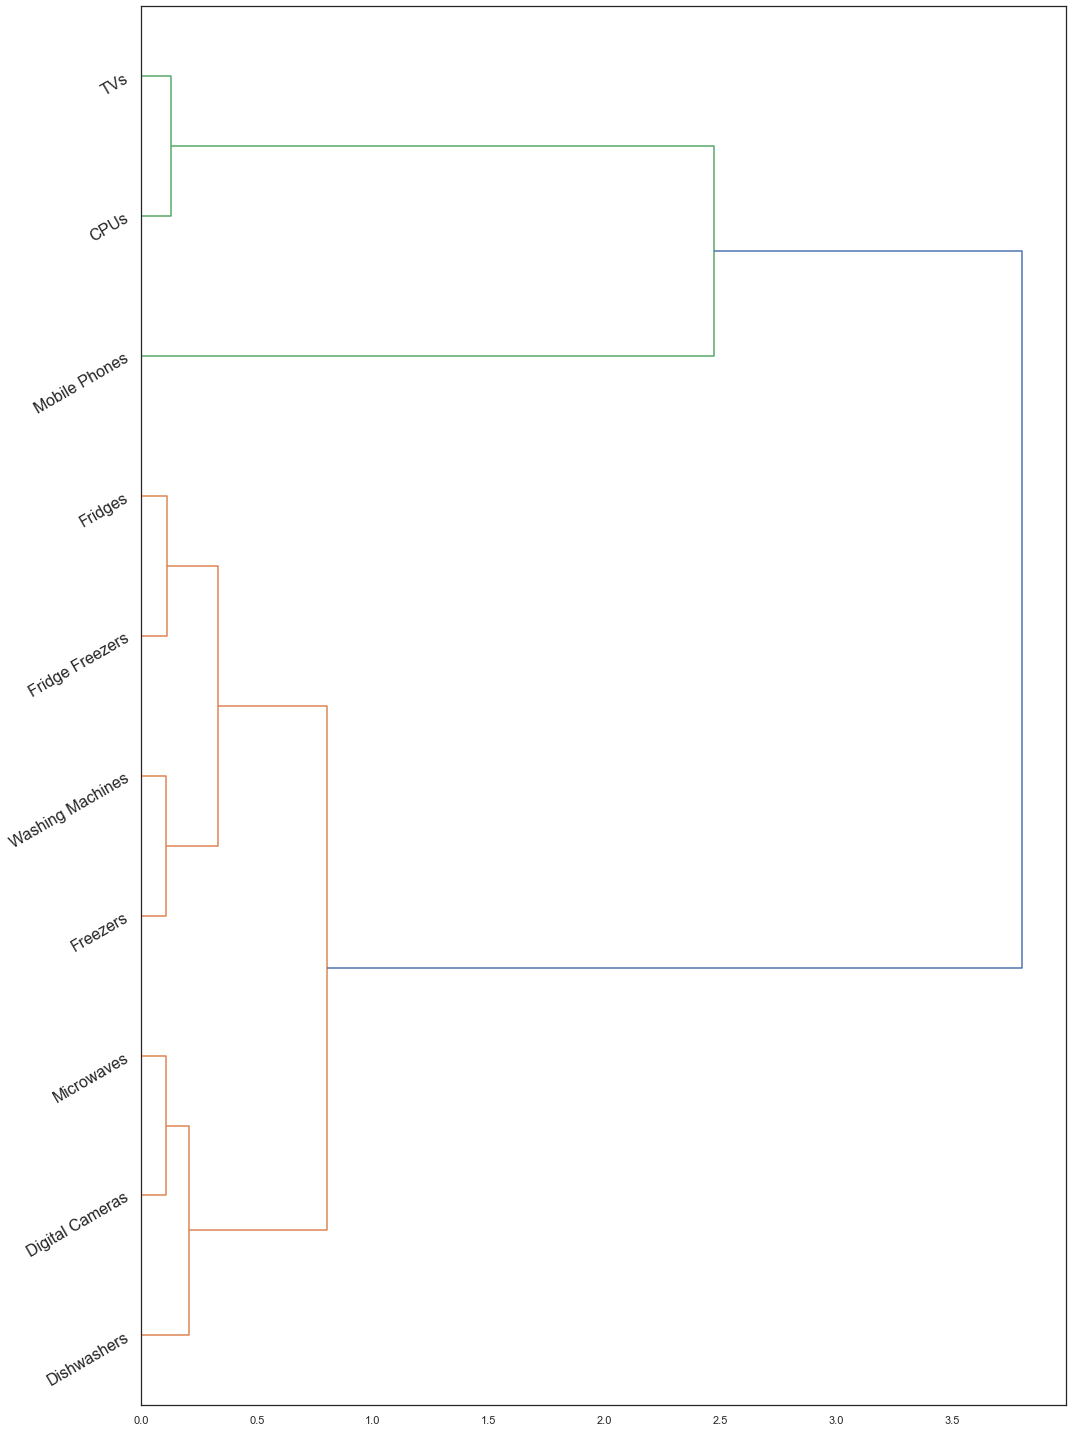

In [65]:
#Plot a Dendogram
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(df['cat_label']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()

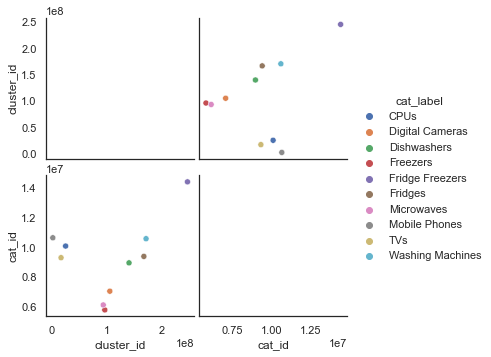

In [70]:
#radius_mean and texture_mean features will be used for clustering. Before clustering process let's check  how our data looks.
import seaborn as sns

sns.pairplot(df.loc[:,['cluster_id','cat_id', 'cat_label']], hue = "cat_label")
plt.show()

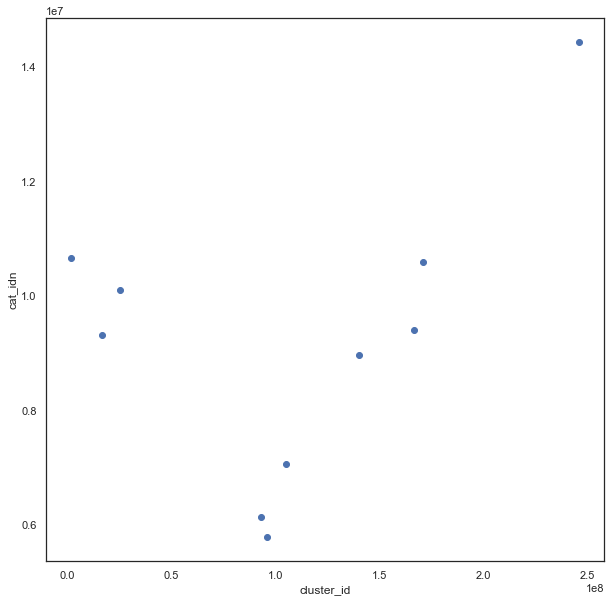

In [72]:
plt.figure(figsize = (10, 10))
plt.scatter(df["cluster_id"], df["cat_id"])
plt.xlabel('cluster_id')
plt.ylabel('cat_idn')
plt.show()

In [77]:
df.head()

,cat_label,product_id,vendor_id,cluster_id,cat_id
0,CPUs,61180385,198975,25340806,10099130
1,Digital Cameras,60449513,294280,105317459,7058049
2,Dishwashers,96818420,612696,140048159,8967456
3,Freezers,79630388,362805,96235154,5797652
4,Fridge Freezers,222054229,939306,245767292,14423622


In [79]:
df['cat_label'] = df['cat_label'].replace({'Mobile Phones':0, 'TVs':1,'CPUs' :2,
                                           'Digital Cameras':3, 'Microwaves':4,'Dishwashers':5,
                                           'Washing Machines':6, 'Freezers':7, 'Fridge Freezers':8,'Fridges':9})


# AgglomerativeClustering

In [81]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df)
df["cat_label"] = cluster

In [83]:
df.cat_label.value_counts()

0    7
1    3
Name: cat_label, dtype: int64

In [84]:
df= df[['cluster_id','cat_id']]

In [85]:
df.head()

,cluster_id,cat_id
0,25340806,10099130
1,105317459,7058049
2,140048159,8967456
3,96235154,5797652
4,245767292,14423622


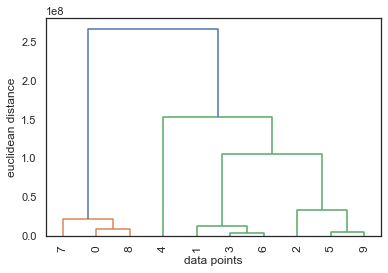

In [86]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()